# Introduction

## About

**Team : The Elite**

- Vidhya Subramaniam
- Devleena Banerjee
- Priyank jha
- Karthik chiranjeevi

## Objective

**Building A Mood Classifier Based On Facial Expressions - With AI and Computer Vision**

The objective of this study is to classify mood of the person from facial expressions Images are categorized in three classes namely sadness, fear and happiness based on the emotion shown in the facial expressions .

## Dataset

The data consists of 48x48 pixel grayscale images of faces. The pixel values are stored in 2304 (48*48) columns. These column names start with pixel. Along with pixel values, there is emotion column that say about mood of the image.

The task is to categorize each face based on the emotion shown in the facial expression in to one of three categories.
 
Along with pixel values, aithon2020_level2_traning.csv dataset contains another column emotion that say about mood that is present in the image. This is the dataset you will use to train your model.

The final test set, which will be used to determine the winner of the competition, will be published later.

https://spotleai.sgp1.digitaloceanspaces.com/course/zip/aithon2020-level-2.zip 

The training dataset is stored inside the data folder.

## Rules of submission

- You have to submit folder after zipped it.

- The name of the folder is aithon2020_yourname_or_teamname

- The folder must not contain any dataset.

- If you have used any python libraries other than in default list, you have to mention in requirements.txt file. 

- There must be aithon_level2.py file inside the folder. 

- And, a function name ‘aithon_level2_api’ must be defined inside the file.

- The function will be called to train and test your program.

- The function name, signature and output type is fixed.

- The first argument is file name that contains data for training.

- The second argument is file name that contains data for test.

- The function must return predicted value or emotion for each data in test dataset sequentially in a list. For example, ['sad', 'happy', 'fear', 'fear', ... , 'happy']

**By default following, Python libraries are installed in test environment**

- Numpy
- Pandas
- OpneCV for Python
- TensorFlows
- Keras
- PyTorch
- Scikit-learn
- Theano
- Matplotlib
- Seaborn

# Importing packages and data

## Import necessary packages

In [3]:
!pip install livelossplot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from livelossplot import PlotLossesKeras
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import random
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Downloading the data

Downloading dataset.zip

In [5]:
!wget https://spotleai.sgp1.digitaloceanspaces.com/course/zip/aithon2020-level-2.zip

--2020-09-14 04:08:02--  https://spotleai.sgp1.digitaloceanspaces.com/course/zip/aithon2020-level-2.zip
Resolving spotleai.sgp1.digitaloceanspaces.com (spotleai.sgp1.digitaloceanspaces.com)... 103.253.144.208
Connecting to spotleai.sgp1.digitaloceanspaces.com (spotleai.sgp1.digitaloceanspaces.com)|103.253.144.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29149906 (28M) [application/zip]
Saving to: ‘aithon2020-level-2.zip’

aithon2020-level-2. 100%[===================>]  27.80M  11.3MB/s    in 2.5s    

2020-09-14 04:08:07 (11.3 MB/s) - ‘aithon2020-level-2.zip’ saved [29149906/29149906]



Extracting the zip

In [6]:
!unzip aithon2020-level-2.zip

Archive:  aithon2020-level-2.zip
   creating: aithon2020-level-2/
  inflating: aithon2020-level-2/.DS_Store  
  inflating: __MACOSX/aithon2020-level-2/._.DS_Store  
  inflating: aithon2020-level-2/requirements.txt  
  inflating: __MACOSX/aithon2020-level-2/._requirements.txt  
   creating: aithon2020-level-2/source/
   creating: aithon2020-level-2/data/
  inflating: aithon2020-level-2/aithon_level2.py  
   creating: aithon2020-level-2/.idea/
  inflating: aithon2020-level-2/source/classification.py  
  inflating: aithon2020-level-2/data/aithon2020_level2_traning.csv  
  inflating: __MACOSX/aithon2020-level-2/data/._aithon2020_level2_traning.csv  
  inflating: aithon2020-level-2/.idea/workspace.xml  
  inflating: aithon2020-level-2/.idea/untitled.iml  
  inflating: aithon2020-level-2/.idea/modules.xml  
  inflating: aithon2020-level-2/.idea/misc.xml  


## Import the training data

In [7]:
train = pd.read_csv('aithon2020-level-2/data/aithon2020_level2_traning.csv')
train.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2264,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
1,Fear,55,55,55,55,55,54,60,68,54,85,151,163,170,179,181,185,188,188,191,196,189,194,198,197,195,194,190,193,195,184,175,172,161,159,158,159,147,136,137,...,64,90,120,121,127,136,128,150,154,157,155,167,172,174,173,171,167,163,164,160,155,148,148,144,130,126,124,116,118,110,90,83,77,53,37,34,30,34,30,57
2,Sad,20,17,19,21,25,38,42,42,46,54,56,62,63,66,82,108,118,130,139,134,132,126,113,97,126,148,157,161,155,154,154,164,189,204,194,168,180,188,214,...,63,42,43,76,80,76,73,69,64,59,53,54,52,54,57,60,66,71,77,85,89,93,102,106,105,99,85,62,34,22,29,36,68,91,85,93,97,99,107,118
3,Happy,4,2,13,41,56,62,67,87,95,62,65,70,80,107,127,149,153,150,165,168,177,187,176,167,152,128,130,149,149,146,130,139,139,143,134,105,78,56,36,...,19,16,11,8,46,47,46,47,48,51,55,55,56,76,85,84,84,77,86,86,80,79,82,84,76,62,57,62,61,62,59,66,80,74,69,99,28,3,7,12
4,Fear,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,43,57,66,74,76,76,82,87,97,72,30,60,68,78,72,63,46,80,80,35,39,48,65,90,89,53,17,37,44,82,94,21,22,51,71,80,82,79,79,83


# Generating images from given data

## image_from_array() : Return images, when passed an array.

In [8]:
def image_from_array(arr,width,height,return_image=False):
    """
    Input : Takes in an array, width and height
    Output: Displays an image by reshaping image to 
            provided width and height.
    
    
    # Press any key to close the window 
    # if return_image=True, then the image matrix is returned
    # instead of displaying it.
    """
    # Reshaping the given array
    img = np.array(arr.reshape(width,height),dtype=np.uint8)
    
    if return_image:
        return img
    
    else:
        # displaying image ; press any button to close
        cv.imshow('image',img)
        cv.waitKey(0)
        cv.destroyAllWindows()

## generate_images(data,labels) : Creates a images folder and stores images

In [ ]:
def generate_images(data,labels):
    """
    Input : Input data matrix of images and lables list
    Output: Store all the images in the /images/ folder 
            along with labels.csv
    """
    # Checking if given data matrix and labels match
    assert len(data)==len(labels),"Input array size ≠ labels size"
    
    # Getting current working directory
    path = os.getcwd()
    label_list = []
    
    try:  
        # Creating a new directory 'images'
        os.mkdir(path+'/images')  
        
    except OSError as error:  
        # If directory already exists
        print(error)
        print("\nDelete the existing images folder & try again")
    store_path = path+'/images/'
    for i in range(len(data)):
        img = image_from_array(data[i],48,48,return_image=True)
        cv.imwrite(store_path+str(i)+'.png',img)
        label_list.append([i,labels[i]])
    label_df = pd.DataFrame(label_list,columns=['Image','Emotion'])
    label_df.to_csv(store_path+'labels.csv',index=False)

In [ ]:
generate_images(train.iloc[:,1:].values,train['emotion'].values)

## generate_images_folderwise(x_train,y_train,x_test,y_test) 

##### Creates folders train and test and in each folder class with images

In [9]:
def generate_images_folderwise(x_train,y_train,x_test,y_test):
    """
    Input : Input data matrix of images, lables list 
    Output: Store all the images in the 
            /images/<train or test>/<class_folder> 
    """
    # Checking if given data matrix and labels match
    assert len(x_train)==len(y_train),"Input array size ≠ labels size"
    assert len(x_test)==len(y_test),"Input array size ≠ labels size"
    
    # Getting current working directory
    path = os.getcwd()
    
    temp = 0
    
    try:  
        # Creating a new directory 'images'
        os.mkdir(path+'/images')
        os.mkdir(path+'/images/'+'train')
        os.mkdir(path+'/images/'+'test')
        
    except OSError as error:  
        # If directory already exists
        print(error)
        print("\nDelete the existing images folder & try again")
        
    store_path = path+'/images/'+'train/'
    class_list = np.unique(y_train)
    for j in class_list:
        temp = 0
        os.mkdir(store_path+str(j))
        for i in range(len(x_train)):
            if y_train[i]==j:
                temp += 1
                img = image_from_array(x_train[i],48,48,return_image=True)
                cv.imwrite(store_path+str(j+'/')+str(temp)+'.png',img)
                
    store_path = path+'/images/'+'test/'
    class_list = np.unique(y_test)
    for j in class_list:
        temp = 0
        os.mkdir(store_path+str(j))
        for i in range(len(x_test)):
            if y_test[i]==j:
                temp += 1
                img = image_from_array(x_test[i],48,48,return_image=True)
                cv.imwrite(store_path+str(j+'/')+str(temp)+'.png',img)

In [10]:
x = train.iloc[:,1:].values
y = train['emotion'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25,random_state=42)
generate_images_folderwise(x_train,y_train,x_val,y_val)

In [11]:
print("x_train : {0},    y_train : {1}".format(x_train.shape,y_train.shape))
print("x_val   : {0},    y_val   : {1}".format(x_val.shape,y_val.shape))
print("x_test  : {0},    y_test  : {1}".format(x_test.shape,y_test.shape))

x_train : (6489, 2304),    y_train : (6489,)
x_val   : (2164, 2304),    y_val   : (2164,)
x_test  : (2164, 2304),    y_test  : (2164,)


Making a copy of x_test

In [12]:
x_test_copy = x_test

# Exploratory data analysis

## Checking for class imbalance

Text(0, 0.5, 'Number of images')

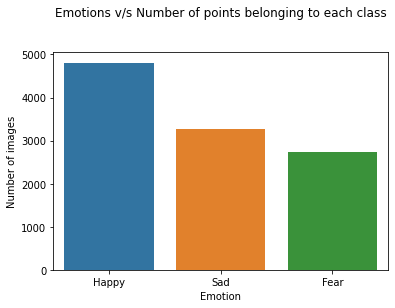

In [13]:
temp = train['emotion'].value_counts()
sns.barplot(x=temp.index,y=temp.values)
plt.title("Emotions v/s Number of points belonging to each class\n\n")
plt.xlabel("Emotion")
plt.ylabel("Number of images")

Points with class label -> Happy are =   44.45779791069613 %
Points with class label -> Sad are =   30.239437921789776 %
Points with class label -> Fear are =   25.3027641675141 %


([<matplotlib.patches.Wedge at 0x7f76e61446a0>,
 [Text(0.19052115567928468, 1.083375137816366, 'Happy'),
  Text(-0.9067898105676032, -0.6226814911740758, 'Sad'),
  Text(0.7703276824781344, -0.7852358000039648, 'Fear')],
 [Text(0.10392063037051891, 0.5909318933543813, '44.5%'),
  Text(-0.4946126239459653, -0.339644449731314, '30.2%'),
  Text(0.4201787358971642, -0.42831043636579896, '25.3%')])

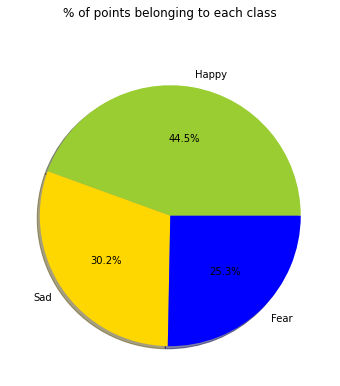

In [14]:
class_label = train['emotion'].value_counts()
total_points = len(train)
print("Points with class label -> Happy are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> Sad are =  ",class_label.values[1]/total_points*100,"%")
print("Points with class label -> Fear are =  ",class_label.values[2]/total_points*100,"%")
labels = ['Happy','Sad','Fear']
sizes = [44.45,30.23,25.30]
colors = ['yellowgreen', 'gold','blue']
plt.figure(figsize=(6,6))
plt.title("% of points belonging to each class\n\n")
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

## Exploring various images from the dataset

The referecne for the code below is taken from :<br>
https://www.kaggle.com/xhlulu/eda-simple-keras-cnn-k-mnist

**The below code loads 25 random images from dataset, with their label.**

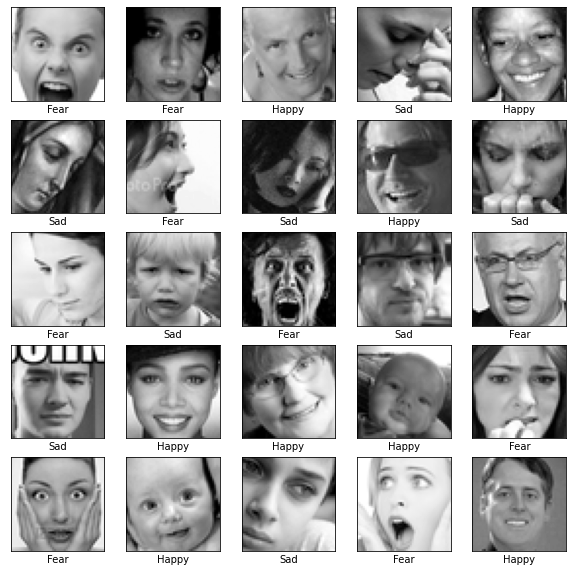

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    temp = np.random.randint(0,10000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image_from_array(train.iloc[temp,1:].values,48,48,return_image=True),cmap="gray")
    plt.xlabel(train['emotion'].values[temp])

# Preparing data for modeling

## Data Augmentation

The reference for below code was taken from : https://www.kaggle.com/sanikamal/multi-class-image-classification-with-augmentation

In [16]:
path = os.getcwd()

TRAINING_DIR = path+"/images/train/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = path+"/images/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    color_mode='grayscale',
    target_size = (48,48),
    batch_size = 64,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    color_mode = 'grayscale',
    target_size = (48,48),
    batch_size = 64,
    class_mode='categorical',
    shuffle=False)

Found 6489 images belonging to 3 classes.
Found 2164 images belonging to 3 classes.


# Modeling

## A simple CNN model

Loading the initial parameters

In [17]:
num_classes = 3
epochs = 100

In [18]:
tf.keras.backend.clear_session()

In [19]:
# Creating the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(48,48,1),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1),strides=2))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        1

In [20]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer=Adam(), 
    metrics=['accuracy'])

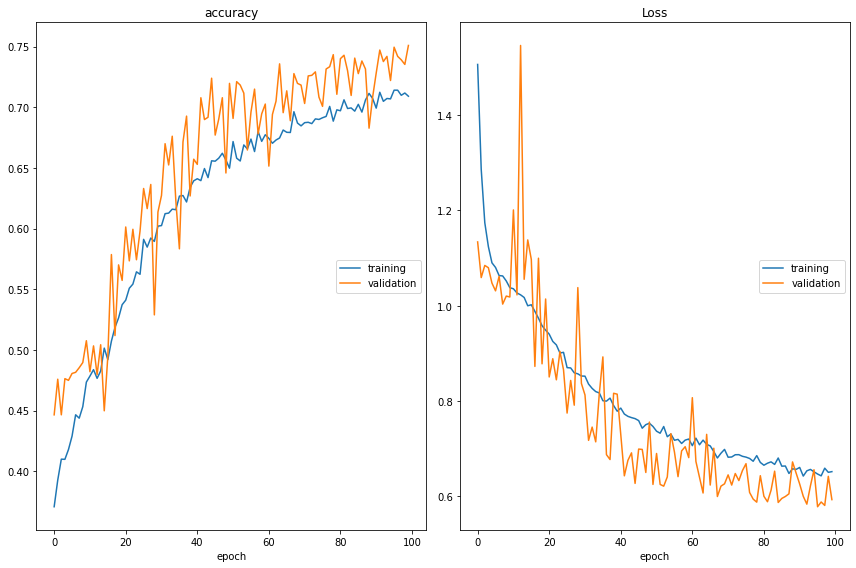

accuracy
	training         	 (min:    0.371, max:    0.714, cur:    0.709)
	validation       	 (min:    0.446, max:    0.751, cur:    0.751)
Loss
	training         	 (min:    0.643, max:    1.506, cur:    0.652)
	validation       	 (min:    0.578, max:    1.546, cur:    0.593)

Epoch 00100: saving model to model_weights.h5
101/101 [==============================] - 6s 55ms/step - loss: 0.6519 - accuracy: 0.7091 - val_loss: 0.5931 - val_accuracy: 0.7509


In [21]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKeras(), checkpoint]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

# Saving the model

In [22]:
model.save('model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets


In [23]:
!zip -r model.zip  model

  adding: model/ (stored 0%)
  adding: model/saved_model.pb (deflated 90%)
  adding: model/assets/ (stored 0%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.index (deflated 74%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 8%)


In [24]:
files.download('model.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluating the model

In [25]:
x_test = x_test.astype('float32')/255.0

In [26]:
train_generator.class_indices

{'Fear': 0, 'Happy': 1, 'Sad': 2}

In [27]:
def evaluate(x_test,return_misclassified=False,y_test=[]):
  output = []
  misclassified_indices = []
  count = 0 
  temp = 0
  for i in range(len(x_test)):
    temp = np.argmax(model.predict(x_test[i].reshape(1,48,48,1)),axis=1)
    if temp ==0:
      output.append('Fear')
    elif temp==1:
      output.append('Happy')
    elif temp==2:
      output.append('Sad')
    if return_misclassified:
      if output[i]!=y_test[i]:
        misclassified_indices.append(i)
  if return_misclassified:
    return output,misclassified_indices
  else:
    return output

In [28]:
output = evaluate(x_test)

In [29]:
print("Accuracy on unseen data : ",np.sum(output==y_test)/len(x_test))

Accuracy on unseen data :  0.7467652495378928


# Understanding the model in depth

## Where the model is going wrong

Getting points from data on which model is not working

In [30]:
output, id = evaluate(x_test,return_misclassified=True,y_test=y_test)

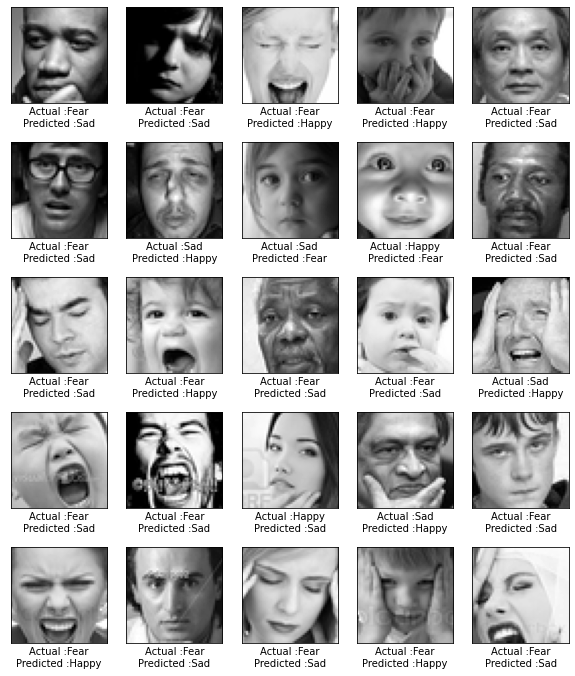

In [31]:
#plt.subplot_tool() -> Use this if you are running in local jupyter-notebook and not colab
plt.figure(figsize=(10,12))
for i in range(25):
    temp = random.sample(id,1)[0]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image_from_array(x_test_copy[temp],48,48,return_image=True),cmap="gray")
    plt.xlabel("Actual :"+y_test[temp]+'\n'+"Predicted :"+output[temp])

## Confusion matrix

In [32]:
cm = confusion_matrix(y_test,output)

In [33]:
cm = pd.DataFrame(cm, columns=['Fear','Happy','Sad'],index=['Fear','Happy','Sad'])

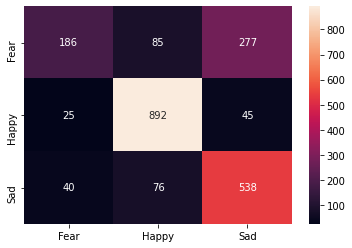

In [35]:
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,annot=True,fmt="d")